# SimpleRNN Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# I. SimpleRNN - without Normalization

> ## 1) Sample Data

* Inputs 3차원 데이터 생성(100, 5, 1)

In [3]:
X = [ [ [i + j] for i in range(5) ] for j in range(100) ]

X

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],
 [[7], [8], [9], [10], [11]],
 [[8], [9], [10], [11], [12]],
 [[9], [10], [11], [12], [13]],
 [[10], [11], [12], [13], [14]],
 [[11], [12], [13], [14], [15]],
 [[12], [13], [14], [15], [16]],
 [[13], [14], [15], [16], [17]],
 [[14], [15], [16], [17], [18]],
 [[15], [16], [17], [18], [19]],
 [[16], [17], [18], [19], [20]],
 [[17], [18], [19], [20], [21]],
 [[18], [19], [20], [21], [22]],
 [[19], [20], [21], [22], [23]],
 [[20], [21], [22], [23], [24]],
 [[21], [22], [23], [24], [25]],
 [[22], [23], [24], [25], [26]],
 [[23], [24], [25], [26], [27]],
 [[24], [25], [26], [27], [28]],
 [[25], [26], [27], [28], [29]],
 [[26], [27], [28], [29], [30]],
 [[27], [28], [29], [30], [31]],
 [[28], [29], [30], [31], [32]],
 [[29], [30], [31], [32], [33]],
 [[30], [31], [32], [33], [34]],
 [[31], [32], [33

In [ ]:
X[:3]

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]]]

In [ ]:
X[-3:]

[[[97], [98], [99], [100], [101]],
 [[98], [99], [100], [101], [102]],
 [[99], [100], [101], [102], [103]]]

In [ ]:
X[0]

[[0], [1], [2], [3], [4]]

* Outputs 데이터 생성(100, 1)

In [4]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [5]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

print(X.shape, X.ndim, X.size)
print(y.shape, y.ndim, y.size)

(100, 5, 1) 3 500
(100,) 1 100


In [6]:
X

array([[[  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.]],

       [[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.]],

       [[  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.]],

       [[  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.]],

       [[  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.]],

       [[  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.]],

       [[  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.]],

       [[  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.]],

       [[  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.]],

       [[  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.]],

       [[ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.]],

       [[ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.]],

       [[ 12.],


In [ ]:
X[0]

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

> ## 3) Train vs. Test Split

* 80:20

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit(=node)만 출력, 5번 순환 결과 최종 아웃풋만 출력하겠다. (Many to One)
* layers.Dense(1) : y_hat
* https://www.cs.toronto.edu/~tingwuwang/rnn_tutorial.pdf

In [8]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,  # hidden cell의 node 3개
                             input_shape = (5, 1),  # 입력 수 만큼 순환
                             return_sequences = False))
model_1.add(layers.Dense(1)) # output

model_1.summary()
# simple rnn의 param이 9개가 아닌 15개가 나온이유 : 가중치가 다른레이어에도 순환하기 때문(BPTT)
# wx1, wt1, b1, wt2, wt3
# wx2, wt2, b2, wt1, wt3
# wx3, wt3, b3, wt1, wt2

Model: "SimpleRNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) Model Compile

In [9]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['mae'])

### (3) Model Fit

In [10]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test),
                    #  verbose = 0
                     )

Epoch 1/100
10/10 [==============================] - 2s 62ms/step - loss: 3720.1040 - mae: 53.5339 - val_loss: 3657.2720 - val_mae: 54.2724
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 3688.1450 - mae: 53.2956 - val_loss: 3628.3569 - val_mae: 54.0454
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3665.3782 - mae: 53.1105 - val_loss: 3609.3523 - val_mae: 53.8799
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 3650.5918 - mae: 52.9784 - val_loss: 3598.2285 - val_mae: 53.7739
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 3641.7668 - mae: 52.8943 - val_loss: 3590.2720 - val_mae: 53.6955
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 3635.1753 - mae: 52.8251 - val_loss: 3583.6548 - val_mae: 53.6302
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 3629.1802 - mae: 52.7682 - val_loss: 3577.9089 - val_mae: 53.5734
Epoch 8/100
10/10 [=======

### (4) Model Predict

In [11]:
y_hat = model_1.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

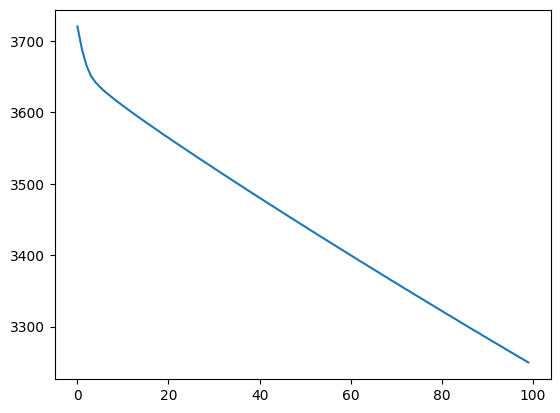

In [12]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

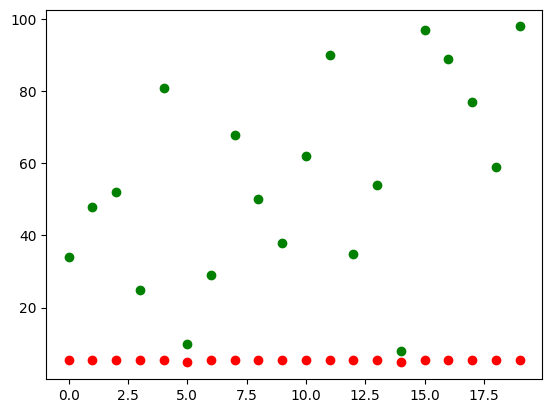

In [13]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [14]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [15]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [17]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), # None 입력시 -1처럼 형을 맞춰줌
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) Model Compile

In [18]:
model_2.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['mae'])

### (3) Model Fit

In [19]:
Hist_2 = model_2.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test),
                     verbose = 0)

### (4) Model Predict

In [20]:
y_hat = model_2.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

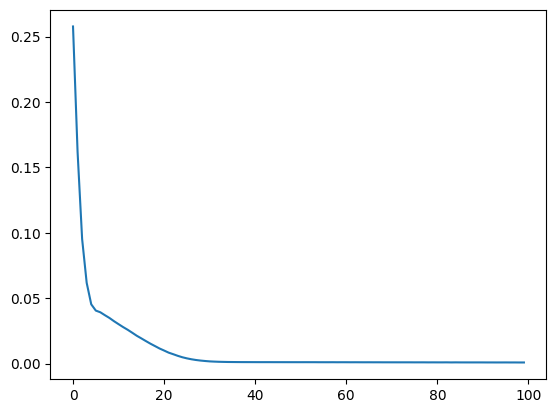

In [21]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

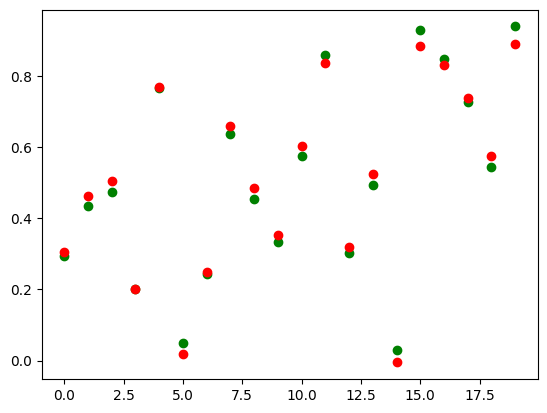

In [22]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_SimpleRNN
- rnn + rnn..
- stack으로 쌓을 때에는 다음 RNN의 인풋을 위해, 앞 RNN이 순환할 떄마다 출력을 해줘야함.
- return_sequences = True

> ## 1) Model Define & Summary

* return_sequences = True

In [23]:
model_3 = models.Sequential(name = 'Stackd_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = True)) #  순환 할 때마다 아웃풋을 출력하겠다.
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False)) # 순환 후 최종 아웃풋만 출력하겠다.
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stackd_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 3)           15        
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

In [24]:
model_3.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['mae'])

> ## 3) Model Fit

In [25]:
Hist_3 = model_3.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test),
                     verbose = 0)

> ## 4) Model Predict

In [26]:
y_hat = model_3.predict(X_test, verbose = 0)

> ## 5) 학습 결과 시각화

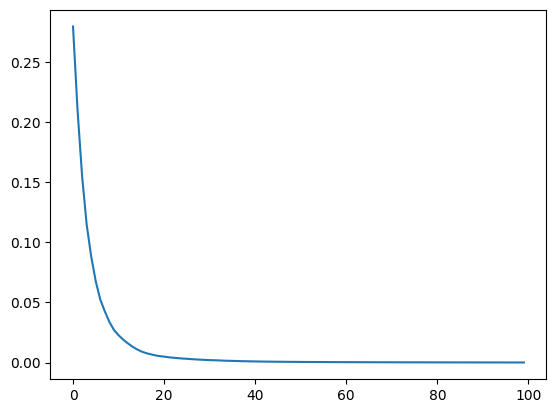

In [27]:
plt.plot(Hist_3.history['loss'])
plt.show()

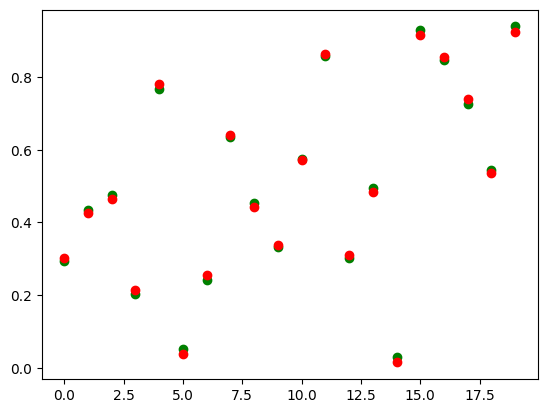

In [28]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# IV. '<font color = 'red'>return_sequences</font>' Output_Options

* '<font color = 'red'>input_length</font>'에 대한 Sequance 전체를 출력할지 설정
 - Sequence: Hidden State
 - 'False' vs. 'True'

> ## 1) 실습데이터 생성

In [ ]:
# X = [[[i + j] for i in range(5)] for j in range(100)]
# X

In [ ]:
# y = [i + 5 for i in range(100)]
# y

In [ ]:
# X = np.array(X, dtype = float)
# y = np.array(y, dtype = float)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data
- input(X_train)이 3차원이었으므로 계산을 위해 X_test도 차원을 맞춰주자

In [30]:
X_test[0], X_test[0].shape

(array([[0.2815534 ],
        [0.29126214],
        [0.30097087],
        [0.31067961],
        [0.32038835]]),
 (5, 1))

In [31]:
X_test[0].reshape(1, 5, 1), X_test[0].reshape(1, 5, 1).shape

(array([[[0.2815534 ],
         [0.29126214],
         [0.30097087],
         [0.31067961],
         [0.32038835]]]),
 (1, 5, 1))

> ## 3) <font color = 'blue'>False</font>_Option

* 마지막 Output만 출력
 * <font color = 'red'>Unit -> 1

In [ ]:
layers.SimpleRNN?

In [32]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1),
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['mae'])

* <font color = 'red'>Output 1개

In [ ]:
Model_False.predict?

In [33]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[-0.20734522]], dtype=float32)

* 마지막 Output만 출력
 * <font color = 'red'>Unit -> 3

In [34]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1),
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['mae'])

* <font color = 'red'>Output 1개(3개 Unit)

In [35]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[ 0.1286259 , -0.19750018, -0.13267191]], dtype=float32)

> ## 4) <font color = 'blue'>True</font>_Option

* 매 순환마다 Output 출력
 * Unit -> 1
 * <font color = 'red'>input_length -> 5

In [36]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1),
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['mae'])

* <font color = 'red'>Output 5개(Hidden State)

In [37]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[-0.3804149 ],
        [-0.6611036 ],
        [-0.7966123 ],
        [-0.84505373],
        [-0.8619408 ]]], dtype=float32)

* 매 순환마다 Output만 출력
 * Unit -> 3
 * <font color = 'red'>input_length -> 5

In [38]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1),
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['mae'])

* <font color = 'red'>Output 5개(Hidden State)

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[-0.0430961 ,  0.01602979, -0.27551445],
        [-0.03688975,  0.18547139, -0.47248057],
        [ 0.02693903,  0.18999428, -0.64955217],
        [-0.047137  ,  0.25230256, -0.73767877],
        [ 0.03526087,  0.29995117, -0.7785345 ]]], dtype=float32)

# The End